In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("/content/drive/MyDrive/Capstone project/data/processed_dataset.csv")

print(df.shape)
df.sample(13, random_state = 41).T

(1252, 16)


,358,878,682,242,636,810,1170,1155,494,340,806,1002,1211
Age,34.0,36.0,33.0,33.0,36.0,39.0,29.0,31.0,36.0,35.0,29.0,39.0,28.0
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
self_employed,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
family_history,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
treatment,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
work_interfere,0.666667,0.0,0.333333,0.666667,0.666667,0.666667,0.0,0.666667,0.666667,0.0,0.666667,0.666667,0.666667
no_employees,0.6,0.0,1.0,0.4,0.4,0.4,0.4,0.4,1.0,0.4,0.6,0.2,0.2
remote_work,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
tech_company,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
leave,0.75,0.25,0.75,0.75,1.0,0.5,0.5,0.5,0.25,0.5,0.25,0.75,0.75


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1252 non-null   float64
 1   Gender              1252 non-null   object 
 2   self_employed       1252 non-null   float64
 3   family_history      1252 non-null   float64
 4   treatment           1252 non-null   float64
 5   work_interfere      1252 non-null   float64
 6   no_employees        1252 non-null   float64
 7   remote_work         1252 non-null   float64
 8   tech_company        1252 non-null   float64
 9   leave               1252 non-null   float64
 10  mental_vs_physical  1252 non-null   float64
 11  Country_top         1252 non-null   object 
 12  workplace_support   1252 non-null   float64
 13  health_interview    1252 non-null   float64
 14  health_consequence  1252 non-null   float64
 15  social_support      1252 non-null   float64
dtypes: flo

In [37]:
print(df.isna().sum())

Age                   0
Gender                0
self_employed         0
family_history        0
treatment             0
work_interfere        0
no_employees          0
remote_work           0
tech_company          0
leave                 0
mental_vs_physical    0
Country_top           0
workplace_support     0
health_interview      0
health_consequence    0
social_support        0
dtype: int64


In [38]:
print(df['treatment'].value_counts())

treatment
1.0    630
0.0    622
Name: count, dtype: int64


Identify Categorical and Numeric Columns

In [39]:
# Target variable
target = 'treatment'


In [40]:
# Columns to drop (raw Age, state, Country since we have better representations)
drop_cols = [ 'Country_top']
df = df.drop(columns=drop_cols)

print("Columns after dropping:", df.columns.tolist())

Columns after dropping: ['Age', 'Gender', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'leave', 'mental_vs_physical', 'workplace_support', 'health_interview', 'health_consequence', 'social_support']


In [41]:
# Features (X) and Target (y)
X = df.drop(columns=[target])
y = df[target]

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (1252, 14)
Target shape: (1252,)


Analyze Most Useful Features

In [42]:
# Correlation analysis

import pandas as pd

# Assume X is your feature DataFrame and y is your target Series
# Encode categorical variables
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

# Compute correlation
correlation = pd.concat([X, y], axis=1).corr()['treatment'].sort_values(ascending=False)

# Print top correlated features
print("Top correlated features:\n", correlation.head(15))


Top correlated features:
 treatment             1.000000
work_interfere        0.464583
family_history        0.375156
workplace_support     0.170184
health_consequence    0.153001
Age                   0.073994
Gender_Non-binary     0.045820
remote_work           0.025527
self_employed         0.012828
no_employees          0.011996
social_support        0.008248
health_interview     -0.027979
tech_company         -0.030229
mental_vs_physical   -0.060901
Gender_Male          -0.080832
Name: treatment, dtype: float64


/tmp/ipython-input-3370149369.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="viridis")


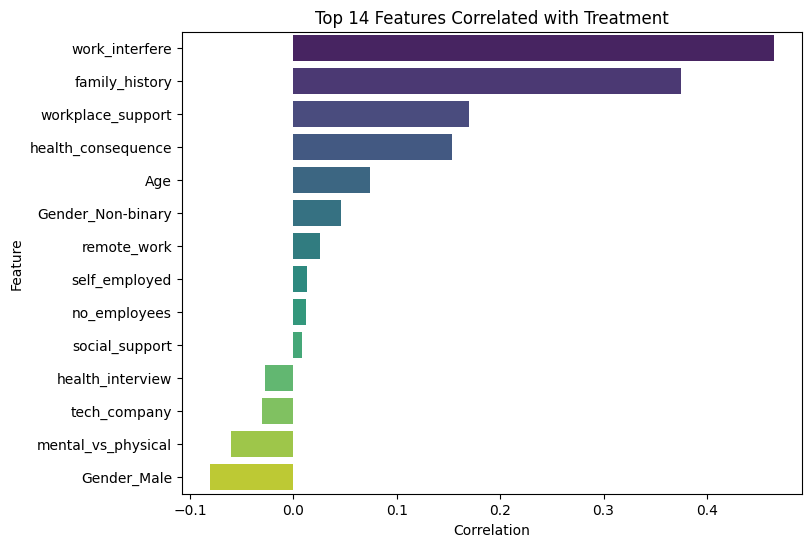

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 14 Correlated Features
top_corr = correlation[1:15]  # exclude treatment itself
plt.figure(figsize=(8,6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="viridis")
plt.title("Top 14 Features Correlated with Treatment")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()

Check Class Distribution

In [44]:
# Check target class balance
print(y.value_counts(normalize=True))
#Helps decide if class imbalance handling is needed (e.g., class_weight='balanced').

treatment
1.0    0.503195
0.0    0.496805
Name: proportion, dtype: float64


Train-Test Split

In [45]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
#stratify=y ensures both train and test sets have similar class distribution.

Train shape: (1001, 15)
Test shape: (251, 15)


Feature Selection

*   (Since Logistic Regression can suffer from multicollinearity and too many dummy variables)
*   we’ll use SelectKBest (based on statistical test like chi-square)



In [46]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 10 features based on ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected top features:\n", selected_features.tolist())

Selected top features:
 ['Age', 'family_history', 'work_interfere', 'tech_company', 'leave', 'mental_vs_physical', 'workplace_support', 'health_consequence', 'Gender_Male', 'Gender_Non-binary']


In [47]:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression with regularization
logreg = LogisticRegression(max_iter=1000, solver='lbfgs', penalty='l2', class_weight='balanced', random_state=42)

# Fit model on selected features
logreg.fit(X_train_selected, y_train)

# Predictions
y_pred = logreg.predict(X_test_selected)
y_proba = logreg.predict_proba(X_test_selected)[:, 1]


max_iter=1000 ensures convergence.

class_weight='balanced' handles imbalance.

We use only top selected features from previous step.

Accuracy: 0.701195219123506
Precision: 0.7073170731707317
Recall: 0.6904761904761905
F1 Score: 0.6987951807228916
ROC-AUC: 0.7990158730158731


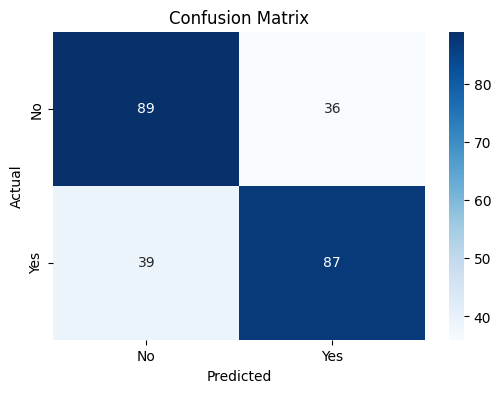

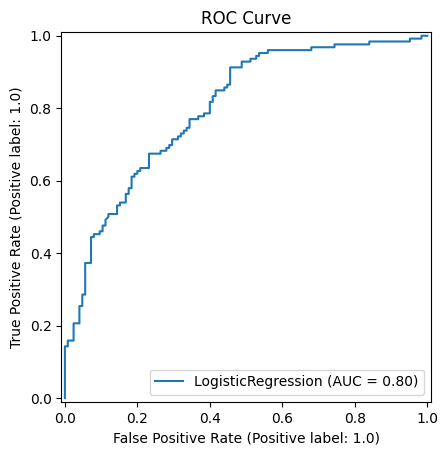

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(logreg, X_test_selected, y_test)
plt.title("ROC Curve")
plt.show()

Positive coefficient → Increases probability of seeking treatment.

Negative coefficient → Decreases probability.

              Feature  Coefficient
2      work_interfere     2.781505
6   workplace_support     1.427018
1      family_history     1.288425
9   Gender_Non-binary     0.780528
7  health_consequence     0.513170
0                 Age     0.010990
3        tech_company     0.002595
5  mental_vs_physical    -0.086071
4               leave    -0.464768
8         Gender_Male    -0.508710


/tmp/ipython-input-2504568887.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients['Coefficient'], y=coefficients['Feature'], palette="coolwarm")


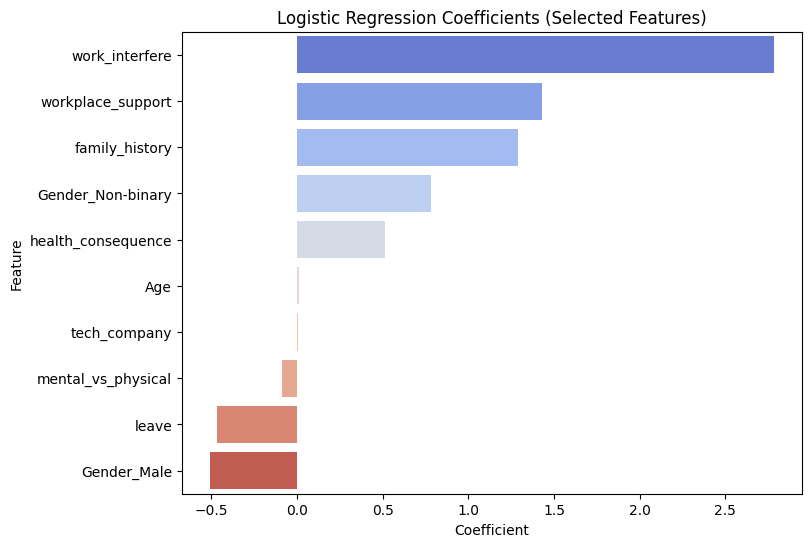

In [49]:
# Check coefficients for selected features
coefficients = pd.DataFrame({'Feature': selected_features, 'Coefficient': logreg.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

# Visualization
plt.figure(figsize=(8,6))
sns.barplot(x=coefficients['Coefficient'], y=coefficients['Feature'], palette="coolwarm")
plt.title("Logistic Regression Coefficients (Selected Features)")
plt.show()


In [50]:
!pip install xgboost

In [51]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

Train XGBoost Model
We’ll start with default parameters and use the same train-test split as Logistic Regression for a fair comparison.

*   use_label_encoder=False avoids warnings.
*   eval_metric='logloss' is standard for classification.




In [52]:
# Initialize XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit model on full feature set
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [22:27:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Evaluate XGBoost Performance

Accuracy: 0.7171314741035857
Precision: 0.7165354330708661
Recall: 0.7222222222222222
F1 Score: 0.7193675889328063
ROC-AUC: 0.7831111111111112


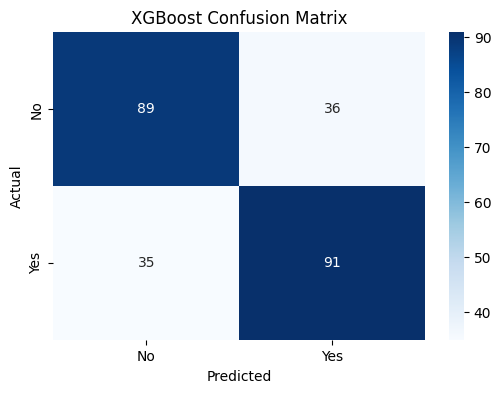

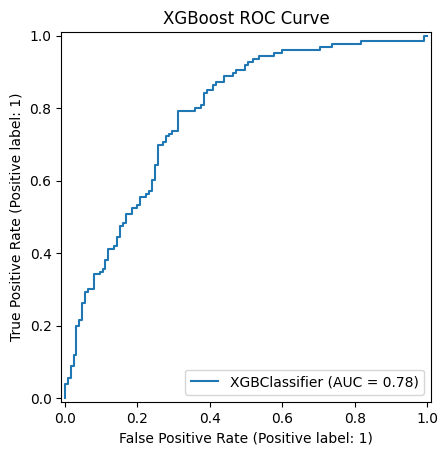

In [53]:
# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title("XGBoost ROC Curve")
plt.show()


Feature Importance (XGBoost)

/tmp/ipython-input-765210236.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_importances.head(15), y=xgb_importances.head(15).index, palette="viridis")


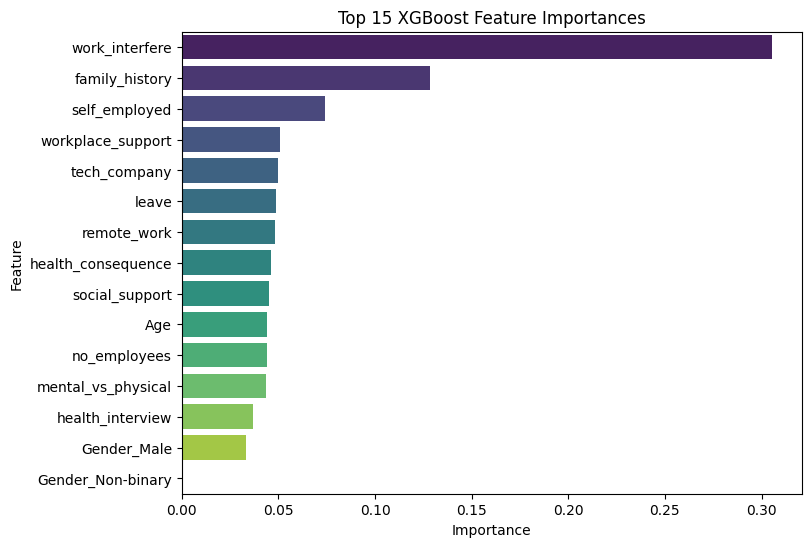

In [54]:
import pandas as pd
import numpy as np

# Get feature importances
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot top 15 important features
plt.figure(figsize=(8,6))
sns.barplot(x=xgb_importances.head(15), y=xgb_importances.head(15).index, palette="viridis")
plt.title("Top 15 XGBoost Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


XGBoost provides gain-based importance, which reflects how much each feature helps split the trees.



Compare with Logistic Regression


In [55]:
# Store metrics
metrics_comparison = pd.DataFrame({
    "Model": ["Logistic Regression (k=20)", "XGBoost"],
    "Accuracy": [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_xgb)],
    "Precision": [precision_score(y_test, y_pred), precision_score(y_test, y_pred_xgb)],
    "Recall": [recall_score(y_test, y_pred), recall_score(y_test, y_pred_xgb)],
    "F1 Score": [f1_score(y_test, y_pred), f1_score(y_test, y_pred_xgb)],
    "ROC-AUC": [roc_auc_score(y_test, y_proba), roc_auc_score(y_test, y_proba_xgb)]
})

print(metrics_comparison)


                        Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression (k=20)  0.701195   0.707317  0.690476  0.698795   
1                     XGBoost  0.717131   0.716535  0.722222  0.719368   

    ROC-AUC  
0  0.799016  
1  0.783111  


Hyperparameter Tuning ( XGBoost default results are not good)

In [56]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Randomized Search
xgb_tuned = RandomizedSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                                param_distributions=param_grid, n_iter=20, scoring='roc_auc',
                                cv=3, verbose=2, random_state=42, n_jobs=-1)

xgb_tuned.fit(X_train, y_train)
print("Best Parameters:", xgb_tuned.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [22:27:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.8}


post-tuning evaluation code:

*   Retrain XGBoost with the best parameters found in xgb_tuned.best_params_
*   Predict again on X_test
*   Recalculate all metrics (Accuracy, Precision, Recall, F1, ROC-AUC) and update the comparison table.



In [57]:
# Get best model after tuning
best_xgb = xgb_tuned.best_estimator_

# Predict on test set
y_pred_xgb_best = best_xgb.predict(X_test)
y_proba_xgb_best = best_xgb.predict_proba(X_test)[:, 1]

# Recalculate metrics
accuracy = accuracy_score(y_test, y_pred_xgb_best)
precision = precision_score(y_test, y_pred_xgb_best)
recall = recall_score(y_test, y_pred_xgb_best)
f1 = f1_score(y_test, y_pred_xgb_best)
roc_auc = roc_auc_score(y_test, y_proba_xgb_best)

print("Tuned XGBoost Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Tuned XGBoost Metrics:
Accuracy: 0.7609561752988048
Precision: 0.746268656716418
Recall: 0.7936507936507936
F1 Score: 0.7692307692307693
ROC-AUC: 0.8177142857142856


for report

In [58]:
# Add Tuned XGBoost row
metrics_comparison = pd.concat([metrics_comparison, pd.DataFrame({
    "Model": ["XGBoost (tuned)"],
    "Accuracy": [accuracy],
    "Precision": [precision],
    "Recall": [recall],
    "F1 Score": [f1],
    "ROC-AUC": [roc_auc]
})], ignore_index=True)

print(metrics_comparison)


                        Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression (k=20)  0.701195   0.707317  0.690476  0.698795   
1                     XGBoost  0.717131   0.716535  0.722222  0.719368   
2             XGBoost (tuned)  0.760956   0.746269  0.793651  0.769231   

    ROC-AUC  
0  0.799016  
1  0.783111  
2  0.817714  


<Figure size 1000x600 with 0 Axes>

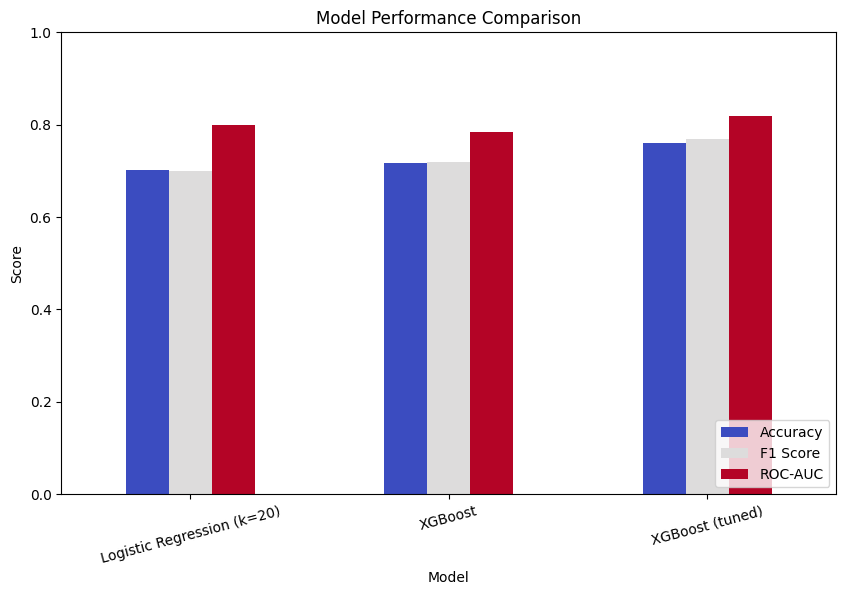

In [59]:
# Plot Accuracy, F1 Score, and ROC-AUC comparison
plt.figure(figsize=(10,6))
metrics_comparison_plot = metrics_comparison.set_index('Model')[['Accuracy', 'F1 Score', 'ROC-AUC']]

metrics_comparison_plot.plot(kind='bar', figsize=(10,6), colormap="coolwarm")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.legend(loc='lower right')
plt.show()


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [61]:
# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Fit model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]


Random Forest Metrics:
Accuracy: 0.7211155378486056
Precision: 0.7089552238805971
Recall: 0.753968253968254
F1 Score: 0.7307692307692307
ROC-AUC: 0.7876190476190476


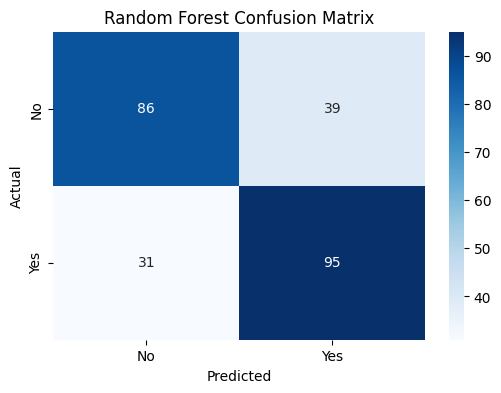

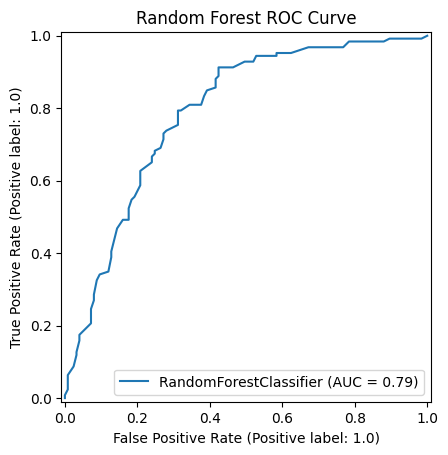

In [62]:
# Metrics
print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Random Forest ROC Curve")
plt.show()


In [63]:
metrics_comparison = pd.concat([metrics_comparison, pd.DataFrame({
    "Model": ["Random Forest"],
    "Accuracy": [accuracy_score(y_test, y_pred_rf)],
    "Precision": [precision_score(y_test, y_pred_rf)],
    "Recall": [recall_score(y_test, y_pred_rf)],
    "F1 Score": [f1_score(y_test, y_pred_rf)],
    "ROC-AUC": [roc_auc_score(y_test, y_proba_rf)]
})], ignore_index=True)

print(metrics_comparison)


                        Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression (k=20)  0.701195   0.707317  0.690476  0.698795   
1                     XGBoost  0.717131   0.716535  0.722222  0.719368   
2             XGBoost (tuned)  0.760956   0.746269  0.793651  0.769231   
3               Random Forest  0.721116   0.708955  0.753968  0.730769   

    ROC-AUC  
0  0.799016  
1  0.783111  
2  0.817714  
3  0.787619  


In [64]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_tuned = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid_rf,
    n_iter=30,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_tuned.fit(X_train, y_train)
print("Best Parameters for RF:", rf_tuned.best_params_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters for RF: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}


In [65]:
# Get the best model from tuning
best_rf = rf_tuned.best_estimator_

# Fit on training data (optional because RandomizedSearchCV already fits it)
best_rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf_best = best_rf.predict(X_test)
y_proba_rf_best = best_rf.predict_proba(X_test)[:, 1]


In [66]:
# Calculate metrics for tuned Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf_best)
precision_rf = precision_score(y_test, y_pred_rf_best)
recall_rf = recall_score(y_test, y_pred_rf_best)
f1_rf = f1_score(y_test, y_pred_rf_best)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf_best)

print("Tuned Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print(f"ROC-AUC: {roc_auc_rf}")


Tuned Random Forest Metrics:
Accuracy: 0.7450199203187251
Precision: 0.7246376811594203
Recall: 0.7936507936507936
F1 Score: 0.7575757575757576
ROC-AUC: 0.8183492063492064


In [67]:
# Add tuned Random Forest row
metrics_comparison = pd.concat([metrics_comparison, pd.DataFrame({
    "Model": ["Random Forest (Tuned)"],
    "Accuracy": [accuracy_rf],
    "Precision": [precision_rf],
    "Recall": [recall_rf],
    "F1 Score": [f1_rf],
    "ROC-AUC": [roc_auc_rf]
})], ignore_index=True)

print(metrics_comparison)


                        Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression (k=20)  0.701195   0.707317  0.690476  0.698795   
1                     XGBoost  0.717131   0.716535  0.722222  0.719368   
2             XGBoost (tuned)  0.760956   0.746269  0.793651  0.769231   
3               Random Forest  0.721116   0.708955  0.753968  0.730769   
4       Random Forest (Tuned)  0.745020   0.724638  0.793651  0.757576   

    ROC-AUC  
0  0.799016  
1  0.783111  
2  0.817714  
3  0.787619  
4  0.818349  


In [68]:
df.sample(10).T

,114,1094,1192,422,632,846,32,754,962,922
Age,28.0,29.0,25.0,28.0,36.0,23.0,30.0,34.0,25.0,29.0
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
self_employed,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
family_history,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
treatment,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
work_interfere,0.666667,0.0,0.0,0.333333,1.0,0.666667,0.666667,0.333333,0.0,0.666667
no_employees,1.0,0.2,0.6,1.0,0.2,0.4,0.8,0.4,0.2,0.4
remote_work,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
tech_company,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
leave,0.5,0.5,0.5,0.5,0.75,0.5,0.75,0.75,1.0,0.75
